In [9]:
import pandas as pd

In [76]:
# import clean dataframe 
url = "https://drive.google.com/file/d/1Fm4y3PhN1c2th7UAA3unPdDi97IqfgQQ/view?usp=sharing"
path = f"https://drive.google.com/uc?export=download&id={url.split('/')[-2]}"
audio_og = pd.read_csv(path)

In [6]:
# !pip install spotipy

In [11]:
audio_og.head()

Unnamed: 0                                               name  \
0           0  Se Eu Quiser Falar Com Deus                   ...   
1           1  Saudade De Bahia                              ...   
2           2  Canta Canta, Minha Gente                      ...   
3           3  Mulher Eu Sei                                 ...   
4           4  Rosa Morena                                   ...   

                                             artist  danceability  energy  \
0  Gilberto Gil                                             0.658  0.2590   
1  Antônio Carlos Jobim                                     0.742  0.3990   
2  Martinho Da Vila                                         0.851  0.7300   
3  Chico César                                              0.705  0.0502   
4  Kurt Elling                                              0.651  0.1190   

   key  loudness  mode  speechiness  acousticness  ...  liveness  valence  \
0   11   -13.141     0       0.0705         0.694  ...     0.975    0.306   
1    2   -12.646     1       0.0346         0.217  ...     0.107    0.693   
2    2   -11.048     1       0.3470         0.453  ...     0.124    0.905   
3    4   -18.115     1       0.0471         0.879  ...     0.386    0.524   
4    6   -19.807     1       0.0380         0.916  ...     0.104    0.402   

     tempo   type duration_ms  time_signature                       id  \
0  110.376             256213               4  1n7JnwviZ7zf0LR1tcGFq7    
1  125.039             191867               4  5QGM1U0eCYrQuwSJwTm5Zq    
2   93.698             152267               4  0NLIFSZxPzQhCwnkn5PJYs    
3  106.802             186227               4  3mXqOdlLE1k67WsAxryPFs    
4  120.941             273680               4  7bSzjzjTkWT2CkIPPdp0eA    

                                                html cluster  \
0  https://open.spotify.com/track/1n7JnwviZ7zf0LR...      14   
1  https://open.spotify.com/track/5QGM1U0eCYrQuwS...      15   
2  https://open.spotify.com/track/0NLIFSZxPzQhCwn...      12   
3  https://open.spotify.com/track/3mXqOdlLE1k67Ws...       1   
4  https://open.spotify.com/track/7bSzjzjTkWT2CkI...       1   

               artists_id  
0  7oEkUINVIj1Nr3Wnj8tzqr  
1  3pO5VjZ4wOHCMBXOvbMISG  
2  6rM2yY0GnVcOHMU5GD3y9E  
3  3vlUveVfzPXzhiPGjHHxOH  
4  1UhC1mCcd9SFXLibHhMX61  

[5 rows x 21 columns]

In [ ]:
# import necessary libraries

import requests # for making HTTP requests
from urllib.parse import urlencode  # for encoding URL parameters
import base64  # for base64 encoding/decoding
import webbrowser  # for opening web pages
import json  # for working with JSON data
import spotipy  # for interacting with the Spotify API
import pickle  # for serializing/deserializing Python objects
from spotipy.oauth2 import SpotifyOAuth  # for Spotify OAuth authorization
import time  # for time-related functions

In [7]:
# get access token from Spotify API
def get_token():
    client_id = 'your_client_id'  # your Spotify client id
    client_secret = 'your_client_secret'  # your Spotify client secret
    
    # concatenate client id and client secret with a colon
    auth_string = client_id + ':' + client_secret
    auth_bytes = auth_string.encode('utf-8')  # encode to bytes
    auth_base64 = str(base64.b64encode(auth_bytes), 'utf-8')  # base64 encode to string

    url = 'https://accounts.spotify.com/api/token'  # Spotify API token endpoint
    headers = {
        'Authorization': 'Basic ' + auth_base64,  # 'Basic' auth using base64 encoded client credentials
        'Content-Type': 'application/x-www-form-urlencoded'  # form URL encoded data
    }
    data = {'grant_type': 'client_credentials'}  # grant type for client credentials flow

    # send POST request to Spotify token endpoint
    result = requests.post(url, headers=headers, data=data)
    json_result = json.loads(result.content)  # parse JSON response
    token = json_result['access_token']  # extract access token from JSON
    return token  # return access token


# generate authorization header with access token
def get_auth_header(token): 
    return {'Authorization': 'Bearer ' + token}  # return authorization header with Bearer token

In [12]:
# function to retrieve genres for each artist in a DataFrame using Spotify API

# to search for artists' genres using Spotify API
def search_for_artists_genres(token): 
    artist_genres = []  # initialize an empty list to store genres for each artist

    # iterate through each row in the DataFrame 'audio_og'
    for i, row in audio_og.iterrows(): 
        artist_id = row['artists_id']  # get the artist ID from the current row
        url = f'https://api.spotify.com/v1/artists/{artist_id}'  # Spotify API endpoint for artist information
        headers = get_auth_header(token)  # get authorization header using the provided access token

        try:
            # send GET request to Spotify API to retrieve artist information
            result = requests.get(url, headers=headers)

            # check if the request was successful (status code 200)
            if result.status_code == 200:
                json_result = result.json()  # parse JSON response
                
                # check if 'genres' key exists and is not empty in the JSON response
                if 'genres' in json_result and json_result['genres']:
                    artists_genre = json_result['genres']  # get genres associated with the artist
                    artist_genres.append(artists_genre)  # append genres to the list
                else:
                    print(f"No artist information found for track {artist_id}")
                    artist_genres.append(None)  # handle cases where no genres are found
            else:
                print(f"Request for track {artist_id} failed with status code {result.status_code}")
                artist_genres.append(None)  # handle errors by adding None to the list

            time.sleep(0.2)  # Pause execution for 0.2 seconds to avoid overwhelming the API
            
        except requests.exceptions.RequestException as e:
            print(f"Error during API request: {e}")
            artist_genres.append(None)  # handle request exceptions by adding None to the list

    return artist_genres  # return the list of genres for all artists

# obtain access token from Spotify API using client credentials flow
token = get_token()
# call the function to search for artists' genres and assign the result to 'artist_genres'
artist_genres = search_for_artists_genres(token)
# add a new column 'artist_genres' to the DataFrame 'audio_og' containing the retrieved genres
audio_og['artist_genres'] = artist_genres
# display the first few rows of the updated DataFrame 'audio_og'
audio_og.head()

No artist information found for track 0F3ecxsZ3eVHCMGnE5EK8D
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 4Yd6o5qtdCVUflCnuLPVG1
No artist information found for track 5wd2VuNxYv2rZ3z6qY0Wvx
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 6hCsqVHnBo1BVQWuIjRMkL
No artist information found for track 7pYCCfn6BMRxE6oMMU8ebR
No artist information found for track 7ipdAhXlrDGrLfb8dGFbnI
No artist information found for track 73In9s7BS9nUHvswj52bmg
No artist information found for track 1i2HMFDoThWNij6CtP9DRd
No artist information found for track 1i2HMFDoThWNij6CtP9DRd
No artist information found for track 1ayT0I2rfy0C7WV08pHBsL
No artist information found for track 5BbaxefJtaIcstDtHvG26h
No artist information found for track 2ZBj0iM00o3cm3RWh1Y2sN
No artist information found for track 5lt0JiMIMZcdfvJDzuaEcS
No artist information fo

No artist information found for track 0jYgWjLAcTxlFKt3vRNaNc
No artist information found for track 1t5Obu0U7nAQiz966y9xLz
No artist information found for track 2QFXAOEj2ow8a3xVkD8Ntg
No artist information found for track 5FCac1z8V31hO0p9omx0E1
No artist information found for track 7avo0PmlW8O1YLEt9DnWQT
No artist information found for track 4PVn1b2WnnXdq80C7uaZLZ
No artist information found for track 4PVn1b2WnnXdq80C7uaZLZ
No artist information found for track 5KNhyW9FCGIvqm3TsNXMUI
No artist information found for track 32Y7xwRsxlcjInRjfXU4fJ
No artist information found for track 5tuj4mBXhM62mDuOKIQLi0
No artist information found for track 7oGHuhJ1ffojXBuxgK4qiy
No artist information found for track 23HVesBhuOEkJuIHwR24lw
No artist information found for track 6rLWD5vrN1ZaNU0peuEH7t
No artist information found for track 7qmLh6I9zRVpNL4abOjv50
No artist information found for track 0uRgQor0jDWaKojnCUhR0b
No artist information found for track 4nmrm4zpgJ0RC6aZRSUEjF
No artist information fo

Request for track 1xy9x7h2jKEg8iG22Sml32 failed with status code 429
Request for track 5YxebzzreNswbtYC1td4cx failed with status code 429
Request for track 6VUdDU44uo3KwSHc9lAEFE failed with status code 429
Request for track 5YxebzzreNswbtYC1td4cx failed with status code 429
Request for track 1qC0iwCgdWNwJM1KCxbX10 failed with status code 429
Request for track 7KcmdvVaaO7Y0pmHQjOEFo failed with status code 429
Request for track 5YxebzzreNswbtYC1td4cx failed with status code 429
Request for track 7KcmdvVaaO7Y0pmHQjOEFo failed with status code 429
Request for track 5K2BdUwQNqXy70BX2L8BQx failed with status code 429
Request for track 3EDwVZensg15abkTt5zfTM failed with status code 429
Request for track 6hLWvGfoZ1QZgvF3oNrdj6 failed with status code 429
Request for track 5YxebzzreNswbtYC1td4cx failed with status code 429
Request for track 1xy9x7h2jKEg8iG22Sml32 failed with status code 429
Request for track 3EDwVZensg15abkTt5zfTM failed with status code 429
Request for track 5K4W6rqBFWDnAN6F

Request for track 6pAwHPeExeUbMd5w7Iny6D failed with status code 429
Request for track 11RgIVDXeEQH3QiYcslcSW failed with status code 429
Request for track 3WLh1Qe8WgEBbb2QJWYYal failed with status code 429
Request for track 7KkUirCiJZhgRN3NbgG98L failed with status code 429
Request for track 4NJhFmfw43RLBLjQvxDuRS failed with status code 429
Request for track 5zyNXVd952fWOjkdGHCvPd failed with status code 429
Request for track 5p6TCmGe9IygOnvamIaZpA failed with status code 429
Request for track 3MKCzCnpzw3TjUYs2v7vDA failed with status code 429
Request for track 4mnATs9xEaQgFB3KiMN6NE failed with status code 429
Request for track 5U827e4jbYz6EjtN0fIDt9 failed with status code 429
Request for track 6n7nd5iceYpXVwcx8VPpxF failed with status code 429
Request for track 17hR0sYHpx7VYTMRfFUOmY failed with status code 429


Unnamed: 0                                               name  \
0              0  Se Eu Quiser Falar Com Deus                   ...   
1              1  Saudade De Bahia                              ...   
2              2  Canta Canta, Minha Gente                      ...   
3              3  Mulher Eu Sei                                 ...   
4              4  Rosa Morena                                   ...   
...          ...                                                ...   
5170        5230  1812 Festival Overture, Op. 49: 1812 Overture,...   
5171        5231  Winter Fragments pour ensemble instrumental, s...   
5172        5232  Schoenberg: 5 Orchestral Pieces, Op. 16: No. 3...   
5173        5233  Serenade For Strings In E, Op.22, B. 52: 1. Mo...   
5174        5234  Ravel: Boléro, M. 81                          ...   

                                                artist  danceability   energy  \
0     Gilberto Gil                                            0.6580  0.25900   
1     Antônio Carlos Jobim                                    0.7420  0.39900   
2     Martinho Da Vila                                        0.8510  0.73000   
3     Chico César                                             0.7050  0.05020   
4     Kurt Elling                                             0.6510  0.11900   
...                                                ...           ...      ...   
5170  Pyotr Ilyich Tchaikovsky                                0.2020  0.06940   
5171  Tristan Murail                                          0.1880  0.10100   
5172  Arnold Schoenberg                                       0.0596  0.00093   
5173  Antonín Dvořák                                          0.1330  0.02080   
5174  Maurice Ravel                                           0.3540  0.04870   

      key  loudness  mode  speechiness  acousticness  ...  valence    tempo  \
0      11   -13.141     0       0.0705         0.694  ...   0.3060  110.376   
1       2   -12.646     1       0.0346         0.217  ...   0.6930  125.039   
2       2   -11.048     1       0.3470         0.453  ...   0.9050   93.698   
3       4   -18.115     1       0.0471         0.879  ...   0.5240  106.802   
4       6   -19.807     1       0.0380         0.916  ...   0.4020  120.941   
...   ...       ...   ...          ...           ...  ...      ...      ...   
5170    3   -23.390     1       0.0473         0.917  ...   0.0655   87.906   
5171    6   -21.873     1       0.0442         0.855  ...   0.0355   83.134   
5172    9   -42.959     1       0.0434         0.951  ...   0.0344   71.573   
5173    4   -29.443     1       0.0419         0.883  ...   0.0591   67.109   
5174    5   -24.568     1       0.0323         0.783  ...   0.2530   64.120   

       type  duration_ms time_signature                       id  \
0                 256213              4  1n7JnwviZ7zf0LR1tcGFq7    
1                 191867              4  5QGM1U0eCYrQuwSJwTm5Zq    
2                 152267              4  0NLIFSZxPzQhCwnkn5PJYs    
3                 186227              4  3mXqOdlLE1k67WsAxryPFs    
4                 273680              4  7bSzjzjTkWT2CkIPPdp0eA    
...     ...          ...            ...                      ...   
5170              995000              4  1aEhYlZtypmipA06SDJ4U3    
5171              855000              4  1Gfqe7TAKklmuZf6hxsH6h    
5172              238187              3  2XNwnFrdMDpismp0VUZ7cU    
5173              314307              4  7ucDwgMtE3YJtEfTbuRhy0    
5174              948787              3  7E1ErYYCn0lYjHODZ1qGuB    

                                                   html cluster  \
0     https://open.spotify.com/track/1n7JnwviZ7zf0LR...      14   
1     https://open.spotify.com/track/5QGM1U0eCYrQuwS...      15   
2     https://open.spotify.com/track/0NLIFSZxPzQhCwn...      12   
3     https://open.spotify.com/track/3mXqOdlLE1k67Ws...       1   
4     https://open.spotify.com/track/7bSzjzjTkWT2CkI...       1   
...         

In [14]:
# import necessary library for displaying file download link
from IPython.display import FileLink

# export DataFrame 'audio_og' to CSV file 'audio_og_genre.csv' without including the index
audio_og.to_csv('audio_og_genre.csv', index=False)
# create a link to download the generated CSV file 'audio_og_genre.csv'
FileLink('audio_og_genre.csv')

C:\Users\tello\Desktop\Formación\Data Science\2023\Bootcamp\5. Unsupervised Machine Learning\audio_og_genre.csv

In [35]:
# first install wordcloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud

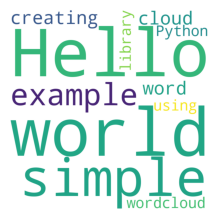

In [36]:
# check if worfcloud was correctly installed
text_data = "Hello world, this is a simple example of creating a word cloud in Python using the wordcloud library."

wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(text_data)

plt.figure(figsize=(2, 3), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [71]:
# Initialize a dictionary to store genres for each cluster as a single string
clusters_genres = {}

# Iterate through each row in the DataFrame
for index, row in audio_og.iterrows():
    cluster = row['cluster']
    genres = row['artist_genres']

    # Check if genres is not None
    if genres is not None:
        # Join genres with commas, replacing spaces with underscores in each genre
        genre_str = ', '.join(genre.replace(' ', '-') for genre in genres)
        
        # If the cluster is not in the dictionary, initialize an empty string
        if cluster not in clusters_genres:
            clusters_genres[cluster] = ''
        
        # Append genres to the corresponding cluster as a string
        clusters_genres[cluster] += genre_str + ', '

# Print the result
for cluster, genres_str in clusters_genres.items():
    print(f"Cluster {cluster}: {genres_str.rstrip(', ')}")

Cluster 14: bossa-nova, mpb, samba, tropicalia, violao, bossa-nova, mpb, musica-paraibana, samba, bossa-nova, mpb, samba, tropicalia, violao, bossa-nova, manguebeat, mpb, samba, samba-rock, tropicalia, bossa-nova, mpb, samba-de-roda, tropicalia, bossa-nova, mpb, samba, tropicalia, violao, argentine-rock, rock-nacional, escape-room, minnesota-hip-hop, pop, trap-queen, dutch-house, edm, electro-house, melbourne-bounce, melbourne-bounce-international, pop-dance, progressive-electro-house, adult-standards, easy-listening, lounge, album-rock, classic-rock, dance-rock, new-romantic, new-wave, new-wave-pop, permanent-wave, post-punk, rock, zolo, dance-pop, girl-group, pop, pop, dance-pop, pop, pop-dance, pop-rap, dance-pop, europop, girl-group, talent-show, dance-pop, girl-group, pop, r&b, urban-contemporary, dance-pop, pop, pop-rap, dance-pop, pop, pop, gangster-rap, hip-hop, pop-rap, rap, trap, urban-contemporary, g-funk, gangster-rap, west-coast-rap, bebop, contemporary-post-bop, cool-jazz

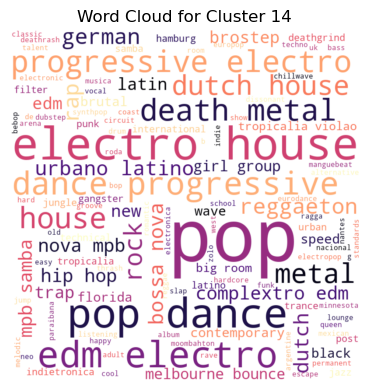

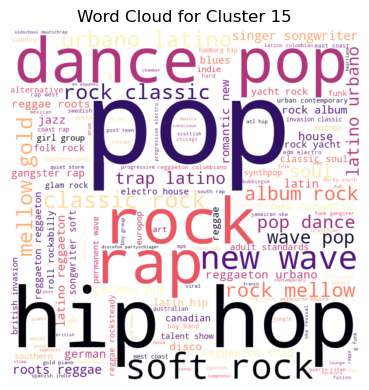

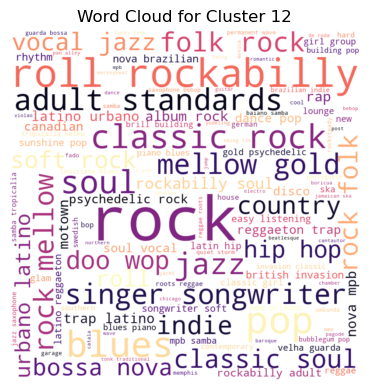

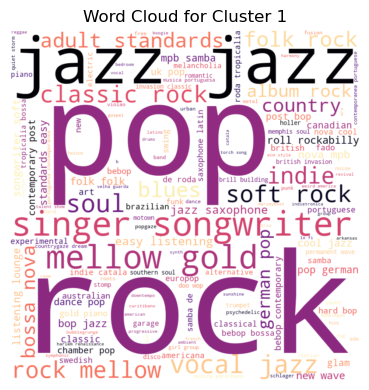

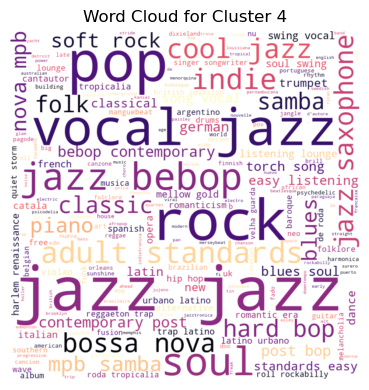

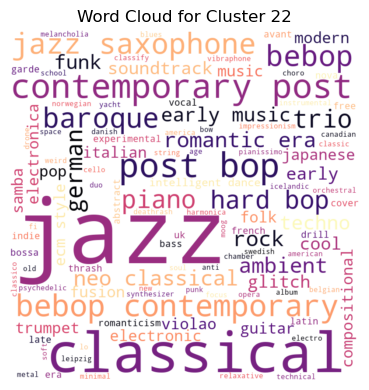

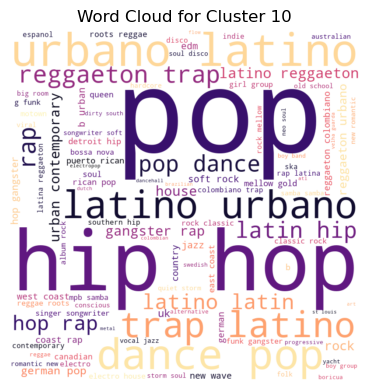

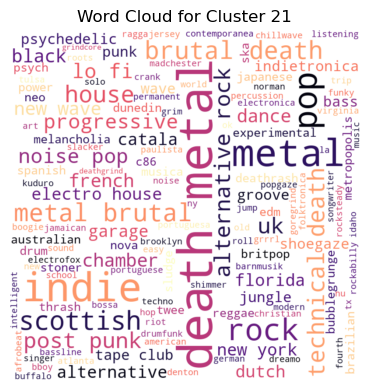

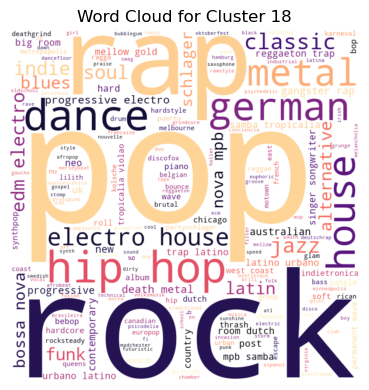

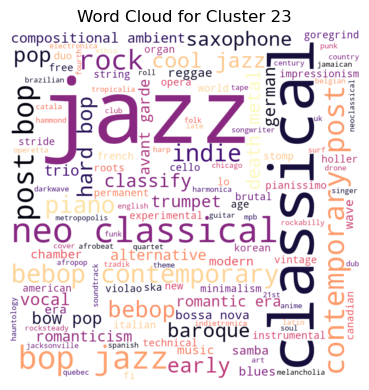

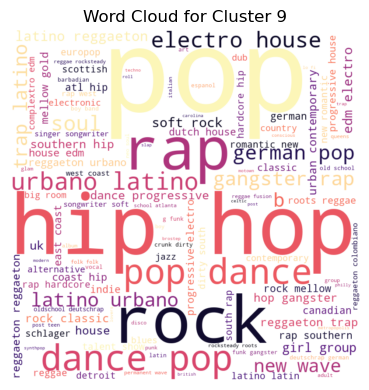

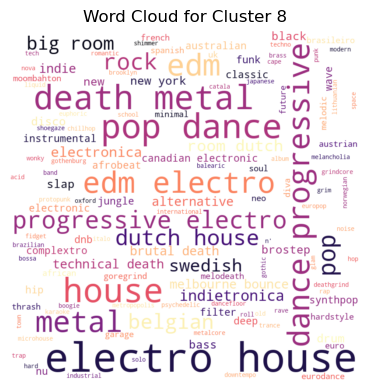

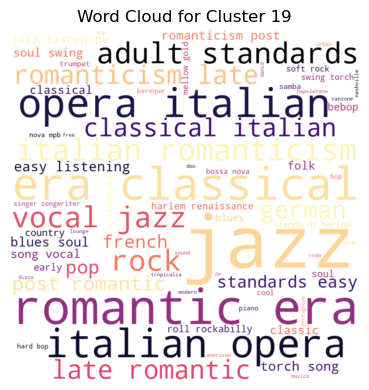

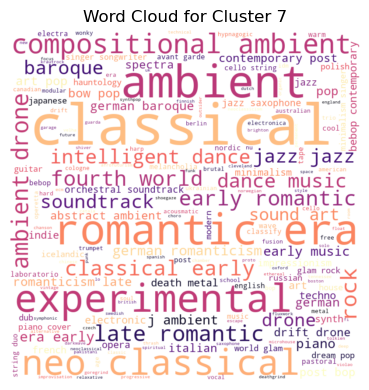

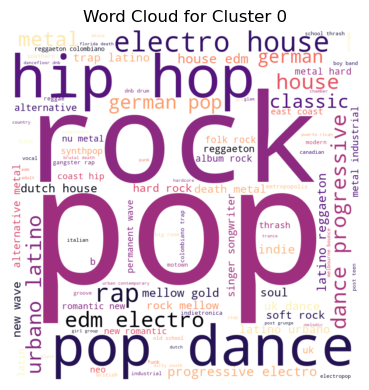

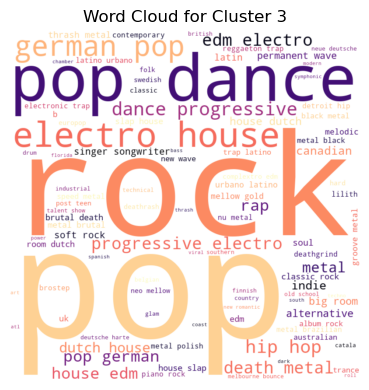

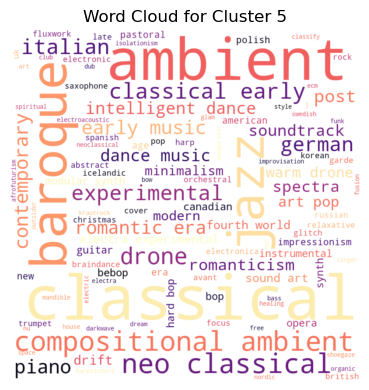

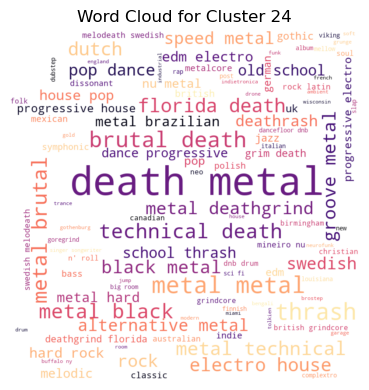

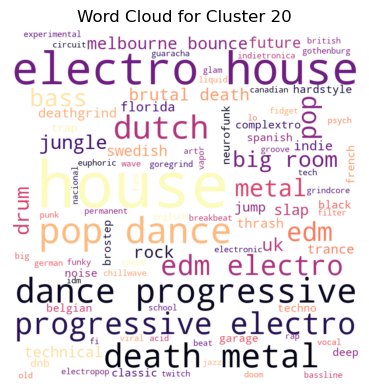

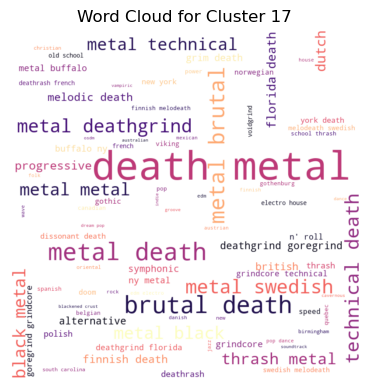

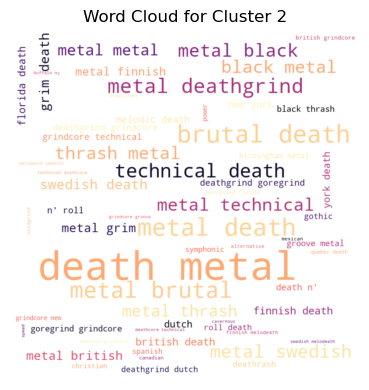

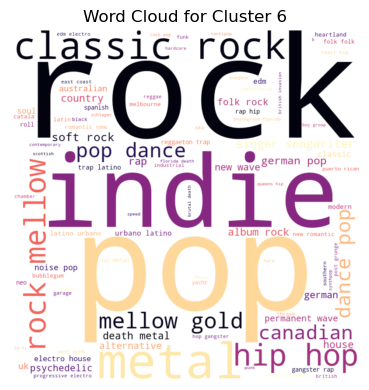

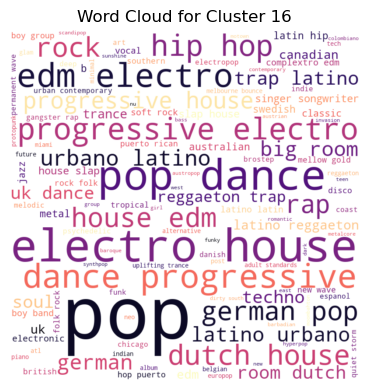

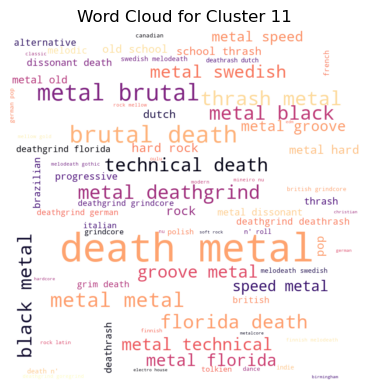

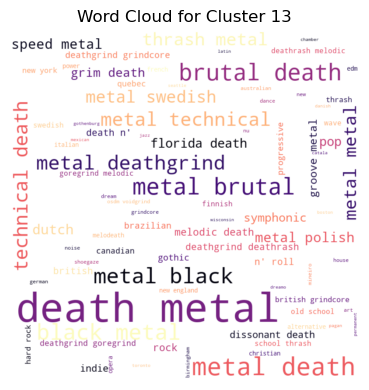

In [75]:
# Generate word clouds for each cluster
for cluster, genres_str in clusters_genres.items():
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10, colormap = 'magma').generate(genres_str)
    
    # Plotting
    plt.figure(figsize=(6, 4))  # Adjust the figure size as needed
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis("off")
    plt.tight_layout()
    plt.show()